# Topic Modelling

## Aim: To implement topic modelling for the given documents using 3 different techniques LDA, LSA, NMF.
## Dataset: News headlines

In [ ]:
!pip install advertools -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install contractions -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install clean-text -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import advertools as adv
import re
import contractions
from cleantext import clean
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
class Preprocess:

  def __init__(self,text):
    self.ltext=text.lower()
    self.text=contractions.fix(self.ltext)
    self.stop_words=set(adv.stopwords['english'])

  def emoji(self):
    e_txt=clean(self.text, no_emoji=True)
    return e_txt

  def remove_quotes_brackets(self,text):
    self.text1=re.sub("[\"\'\(\)]", "", text)
    return self.text1

  def remove_punctuations(self,text):
    text1=re.sub(r"[^\w\s]", " ",text)
    return text1

  def remove_digits(self,text):
    dtext = re.sub(r'\d', '', text)
    return dtext

  def tokenize(self,text):
    self.t_text=word_tokenize(text)
    return self.t_text

  def stop_word(self,text):
    self.sw=[]
    for i in text:
      if i not in self.stop_words:
        self.sw.append(i)
    return self.sw

  def lemma(self,text):
    lst=[]
    lemmatizer = WordNetLemmatizer()
    for i in text:
      lst.append(lemmatizer.lemmatize(i))
    return lst

  def preprocess(self):
    e_txt=self.emoji()
    q_text=self.remove_quotes_brackets(e_txt)
    p_text=self.remove_punctuations(q_text)
    d_text=self.remove_digits(p_text)
    t_text=self.tokenize(d_text)
    swtext=self.stop_word(t_text)
    l_text=self.lemma(swtext)
    word=' '.join(swtext)
    return word


In [ ]:
txt1='''India's economy to grow 6.5%, will become fastest growing major economy: Economic Survey'''

In [ ]:
txt2='''2020 JNU violence: Mumbai Police withdraws case against 36 protesters'''

In [ ]:
txt3='''Earthquake of 4.5 magnitude jolts Manipur'''

In [ ]:
txt4='''3 injured in gunfight between shooters of Lawrence Bishnoi gang, police in Jaipur'''

In [ ]:
txt5='''Shah Rukh Khan pens a sweet birthday note for Pathaan co-star Deepika Padukone, drops a new poster'''

In [ ]:
txt6='''Would have Liked Maradona to hand me World Cup Trophy: Messi'''

In [ ]:
txt7='''Australian Open clocks record attendance despite schedule disruptions due to rain'''

In [ ]:
d={}
j=1
for i in (txt1,txt2,txt3,txt4,txt5,txt5,txt6,txt7):
  p=Preprocess(i)
  l=p.preprocess()
  d[j]=l
  j+=1
print(d)

{1: 'indias economy grow fastest growing major economy economic survey', 2: 'jnu violence mumbai police withdraws case protesters', 3: 'earthquake magnitude jolts manipur', 4: 'injured gunfight shooters lawrence bishnoi gang police jaipur', 5: 'shah rukh khan pens sweet birthday note pathaan co star deepika padukone drops new poster', 6: 'shah rukh khan pens sweet birthday note pathaan co star deepika padukone drops new poster', 7: 'liked maradona hand world cup trophy messi', 8: 'australian open clocks record attendance despite schedule disruptions rain'}


In [ ]:
df=pd.DataFrame(list(d.items()),columns=['document','text'])
df.set_index('document')

,text
document,
1,indias economy grow fastest growing major econ...
2,jnu violence mumbai police withdraws case prot...
3,earthquake magnitude jolts manipur
4,injured gunfight shooters lawrence bishnoi gan...
5,shah rukh khan pens sweet birthday note pathaa...
6,shah rukh khan pens sweet birthday note pathaa...
7,liked maradona hand world cup trophy messi
8,australian open clocks record attendance despi...


In [ ]:
tf=TfidfVectorizer()

In [ ]:
tfidf=tf.fit_transform(df['text'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=4,
learning_method='online',random_state=42,max_iter=20)
lda_top=lda_model.fit_transform(tfidf)

In [ ]:
dt={}
t={}
print('The percentage of a document belonging to each topic ')
for doc in range(len(lda_top)):
  print(f'\nDocument {doc+1}\n')
  for i,topic in enumerate(lda_top[doc]):
    print("Topic",i+1,":",round(topic*100,2),"%")
    t[i+1]=round(topic*100,2)
    Keymax = max(t, key= lambda x: t[x])
    dt[doc+1]=Keymax


print('\nThe documents belong to these topics\n')
for i in range(len(dt)):
  print(f'Document {i+1} ---> Topic {dt[i+1]}')

The percentage of a document belonging to each topic 

Document 1

Topic 1 : 6.79 %
Topic 2 : 6.82 %
Topic 3 : 6.8 %
Topic 4 : 79.59 %

Document 2

Topic 1 : 79.18 %
Topic 2 : 6.94 %
Topic 3 : 6.92 %
Topic 4 : 6.96 %

Document 3

Topic 1 : 74.84 %
Topic 2 : 8.4 %
Topic 3 : 8.38 %
Topic 4 : 8.38 %

Document 4

Topic 1 : 6.64 %
Topic 2 : 6.62 %
Topic 3 : 6.59 %
Topic 4 : 80.15 %

Document 5

Topic 1 : 5.16 %
Topic 2 : 5.18 %
Topic 3 : 84.5 %
Topic 4 : 5.16 %

Document 6

Topic 1 : 5.16 %
Topic 2 : 5.18 %
Topic 3 : 84.5 %
Topic 4 : 5.16 %

Document 7

Topic 1 : 79.25 %
Topic 2 : 6.93 %
Topic 3 : 6.91 %
Topic 4 : 6.91 %

Document 8

Topic 1 : 6.31 %
Topic 2 : 6.33 %
Topic 3 : 6.3 %
Topic 4 : 81.06 %

The documents belong to these topics

Document 1 ---> Topic 4
Document 2 ---> Topic 1
Document 3 ---> Topic 1
Document 4 ---> Topic 4
Document 5 ---> Topic 3
Document 6 ---> Topic 3
Document 7 ---> Topic 1
Document 8 ---> Topic 4


In [ ]:
vocab_tfidf=tf.get_feature_names_out()

In [ ]:
to=[]
topic_words=lda_model.components_
for i,  topic_dist in enumerate(topic_words):
  sorted_topic_dist = np.argsort(topic_dist) # indices
  topic_words = np.array(vocab_tfidf)[sorted_topic_dist] # words in order
  to.append(topic_words)

In [ ]:
def show_wordcloud(df, title):
    text = ' '.join(df.astype(str))
    fig_wordcloud = WordCloud(background_color='white',
                    colormap='viridis', width=400, height=400).generate(text)
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

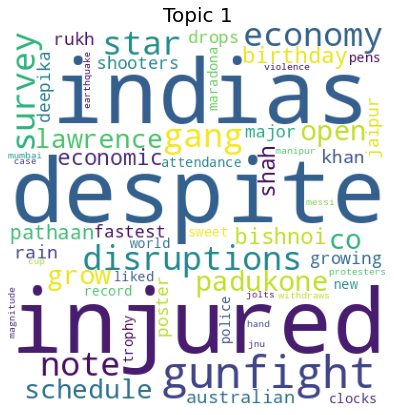

In [ ]:
show_wordcloud(to[0],'Topic 1')

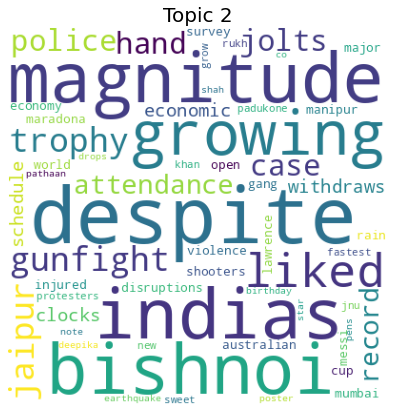

In [ ]:
show_wordcloud(to[1],'Topic 2')

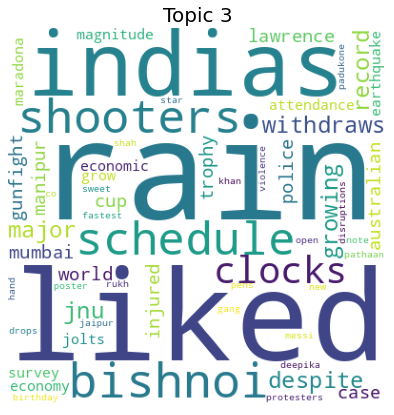

In [ ]:
show_wordcloud(to[2],'Topic 3')

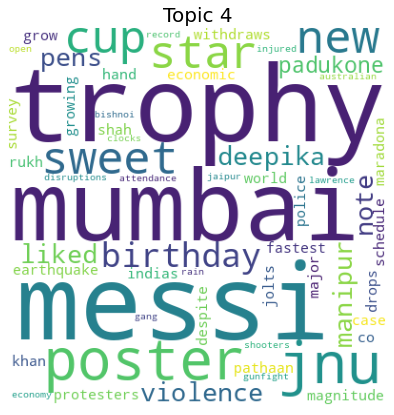

In [ ]:
show_wordcloud(to[3],'Topic 4')

In [ ]:
# LSA

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=4, algorithm='randomized', n_iter=100, random_state=122)
lsa_top=svd_model.fit_transform(tfidf)

In [ ]:
terms = tf.get_feature_names_out()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ",end=' ')
    for t in sorted_terms:
        print(t[0],end=' ')
    print()

Topic 1:  birthday co deepika drops khan new note padukone pathaan pens 
Topic 2:  police case jnu mumbai protesters violence withdraws bishnoi gang gunfight 
Topic 3:  economy economic fastest grow growing indias major survey bishnoi birthday 
Topic 4:  world cup hand liked maradona messi trophy australian attendance clocks 


In [ ]:
dt={}
t={}
print('The percentage of a document belonging to each topic ')
for doc in range(len(lsa_top)):
  print(f'\nDocument {doc+1}\n')
  for i,topic in enumerate(lsa_top[doc]):
    print("Topic",i+1,":",round(topic*100,2),"%")
    t[i+1]=round(topic*100,2)
    Keymax = max(t, key= lambda x: t[x])
    dt[doc+1]=Keymax


print('\nThe documents belong to these topics\n')
for i in range(len(dt)):
  print(f'Document {i+1} ---> Topic {dt[i+1]}')

The percentage of a document belonging to each topic 

Document 1

Topic 1 : 0.0 %
Topic 2 : -0.0 %
Topic 3 : 100.0 %
Topic 4 : 0.0 %

Document 2

Topic 1 : 0.0 %
Topic 2 : 74.09 %
Topic 3 : -0.0 %
Topic 4 : -0.0 %

Document 3

Topic 1 : 0.0 %
Topic 2 : 0.0 %
Topic 3 : -0.0 %
Topic 4 : 22.36 %

Document 4

Topic 1 : 0.0 %
Topic 2 : 74.09 %
Topic 3 : 0.0 %
Topic 4 : -0.0 %

Document 5

Topic 1 : 100.0 %
Topic 2 : -0.0 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 6

Topic 1 : 100.0 %
Topic 2 : -0.0 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 7

Topic 1 : -0.0 %
Topic 2 : 0.0 %
Topic 3 : -0.0 %
Topic 4 : 72.23 %

Document 8

Topic 1 : -0.0 %
Topic 2 : -0.0 %
Topic 3 : 0.0 %
Topic 4 : 65.45 %

The documents belong to these topics

Document 1 ---> Topic 3
Document 2 ---> Topic 2
Document 3 ---> Topic 4
Document 4 ---> Topic 2
Document 5 ---> Topic 1
Document 6 ---> Topic 1
Document 7 ---> Topic 4
Document 8 ---> Topic 4


In [ ]:
from sklearn.decomposition import NMF
tf=TfidfVectorizer()
tfidf=tf.fit_transform(df['text'])
vocab_tfidf=tf.get_feature_names_out()
nmf_model=NMF(4)
nmf_top=nmf_model.fit_transform(tfidf)

In [ ]:
dt={}
t={}
print('The percentage of a document belonging to each topic ')
for doc in range(len(nmf_top)):
  print(f'\nDocument {doc+1}\n')
  for i,topic in enumerate(nmf_top[doc]):
    print("Topic",i+1,":",round(topic*100,2),"%")
    t[i+1]=round(topic*100,2)
    Keymax = max(t, key= lambda x: t[x])
    dt[doc+1]=Keymax


print('\nThe documents belong to these topics\n')
for i in range(len(dt)):
  print(f'Document {i+1} ---> Topic {dt[i+1]}')

The percentage of a document belonging to each topic 

Document 1

Topic 1 : 0.0 %
Topic 2 : 0.0 %
Topic 3 : 0.0 %
Topic 4 : 88.53 %

Document 2

Topic 1 : 0.0 %
Topic 2 : 61.54 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 3

Topic 1 : 0.0 %
Topic 2 : 0.0 %
Topic 3 : 31.09 %
Topic 4 : 0.0 %

Document 4

Topic 1 : 0.0 %
Topic 2 : 61.54 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 5

Topic 1 : 73.06 %
Topic 2 : 0.0 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 6

Topic 1 : 73.06 %
Topic 2 : 0.0 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 7

Topic 1 : 0.0 %
Topic 2 : 0.02 %
Topic 3 : 4.23 %
Topic 4 : 3.97 %

Document 8

Topic 1 : 0.0 %
Topic 2 : 0.0 %
Topic 3 : 81.6 %
Topic 4 : 0.0 %

The documents belong to these topics

Document 1 ---> Topic 4
Document 2 ---> Topic 2
Document 3 ---> Topic 3
Document 4 ---> Topic 2
Document 5 ---> Topic 1
Document 6 ---> Topic 1
Document 7 ---> Topic 3
Document 8 ---> Topic 3


In [ ]:
dt={}
t={}
print('The percentage of a document belonging to each topic ')
for doc in range(len(nmf_top)):
  print(f'\nDocument {doc+1}\n')
  for i,topic in enumerate(nmf_top[doc]):
    print("Topic",i+1,":",round(topic*100,2),"%")
    t[i+1]=round(topic*100,2)
    Keymax = max(t, key= lambda x: t[x])
    dt[doc+1]=Keymax


print('\nThe documents belong to these topics\n')
for i in range(len(dt)):
  print(f'Document {i+1} ---> Topic {dt[i+1]}')

The percentage of a document belonging to each topic 

Document 1

Topic 1 : 0.0 %
Topic 2 : 0.0 %
Topic 3 : 0.0 %
Topic 4 : 88.53 %

Document 2

Topic 1 : 0.0 %
Topic 2 : 61.54 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 3

Topic 1 : 0.0 %
Topic 2 : 0.0 %
Topic 3 : 31.09 %
Topic 4 : 0.0 %

Document 4

Topic 1 : 0.0 %
Topic 2 : 61.54 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 5

Topic 1 : 73.06 %
Topic 2 : 0.0 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 6

Topic 1 : 73.06 %
Topic 2 : 0.0 %
Topic 3 : 0.0 %
Topic 4 : 0.0 %

Document 7

Topic 1 : 0.0 %
Topic 2 : 0.02 %
Topic 3 : 4.23 %
Topic 4 : 3.97 %

Document 8

Topic 1 : 0.0 %
Topic 2 : 0.0 %
Topic 3 : 81.6 %
Topic 4 : 0.0 %

The documents belong to these topics

Document 1 ---> Topic 4
Document 2 ---> Topic 2
Document 3 ---> Topic 3
Document 4 ---> Topic 2
Document 5 ---> Topic 1
Document 6 ---> Topic 1
Document 7 ---> Topic 3
Document 8 ---> Topic 3


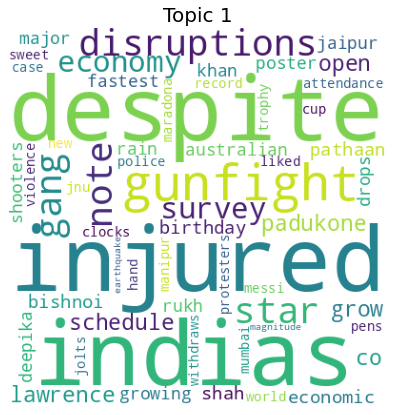

In [ ]:
show_wordcloud(to[0],'Topic 1')

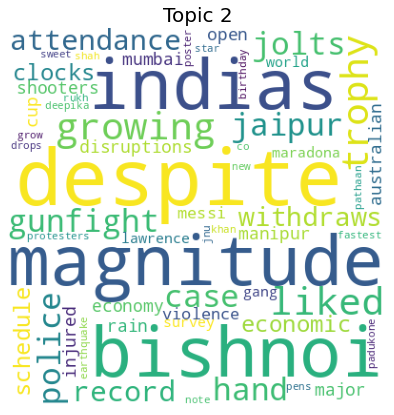

In [ ]:
show_wordcloud(to[1],'Topic 2')

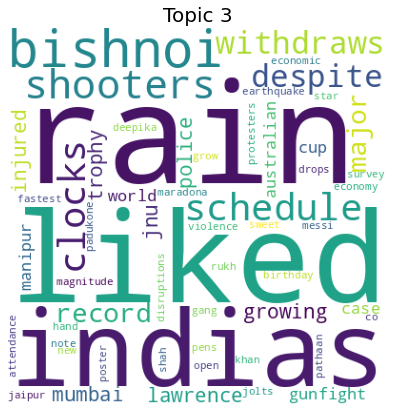

In [ ]:
show_wordcloud(to[2],'Topic 3')

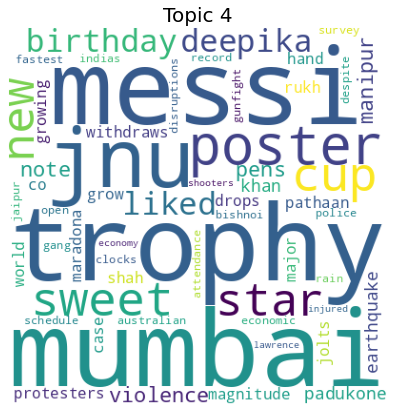

In [ ]:
show_wordcloud(to[3],'Topic 4')

## Conclusion: All the 3 techniques gave topics to each document. LSA and NMF performed similar topic modelling whereas LDA topic modelling gave different output.